In [ ]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [2]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/train.csv')
test= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/test.csv')

In [85]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


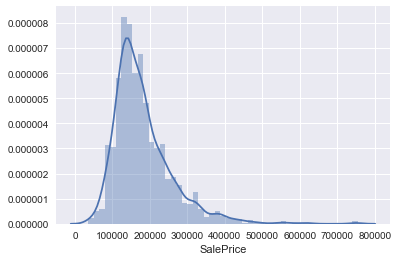

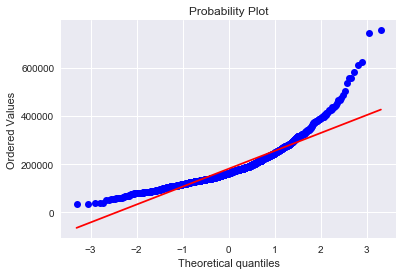

In [3]:
sns.distplot(train.SalePrice)
fig = plt.figure(figsize=[6,4])
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


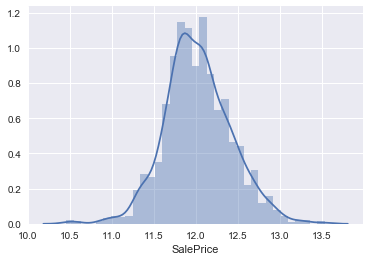

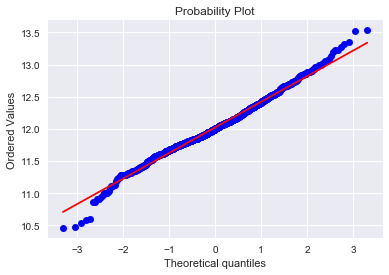

In [4]:
sns.distplot(np.log(train.SalePrice))
fig = plt.figure(figsize=[6,4])
res = stats.probplot(np.log(train.SalePrice), plot=plt)

In [74]:
data= pd.concat([train.drop(['SalePrice'], axis=1), test])

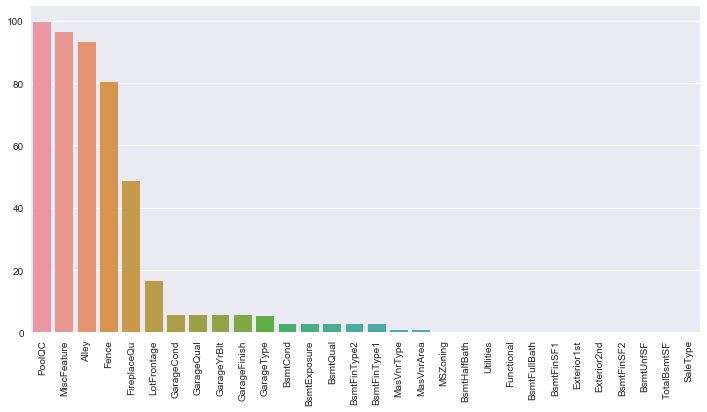

In [80]:
xx= (data.isnull().sum())/len(data)*100
xx=xx.sort_values(ascending=False).head(30)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(xx.keys(), xx)

In [168]:
corr=train.corr()
corr['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

In [211]:
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing= pd.concat([total,percent], axis=1, join='outer', keys=['Total missing count', 'Percentage '])
missing.head(40)

,Total missing count,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [81]:
data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738, 144, 368, 444, 228, 561,
       800], dtype=int64)

In [89]:
data[data['PoolArea']!=0][['Id','PoolArea', 'PoolQC','OverallQual']]

,Id,PoolArea,PoolQC,OverallQual
197,198,512,Ex,8
810,811,648,Fa,6
1170,1171,576,Gd,6
1182,1183,555,Ex,10
1298,1299,480,Gd,10
1386,1387,519,Fa,7
1423,1424,738,Gd,6
514,1975,144,Ex,10
960,2421,368,NaN,4
1043,2504,444,NaN,6


In [88]:
data.shape

(2919, 80)

In [19]:
data['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500, 12500,  1500,   300,    80,   490,   650,
         900,   750,  6500,  1000,  4500,  3000, 17000,  1512,   455,
         460,   420], dtype=int64)

In [101]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [105]:
data[data['MiscVal']>10000][['Id','MiscFeature', 'MiscVal','OverallQual']]

,Id,MiscFeature,MiscVal,OverallQual
346,347,Gar2,15500,6
1,1462,Gar2,12500,6
1089,2550,NaN,17000,10


In [39]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [125]:
data[data['Fireplaces']==0][['Id','Fireplaces','FireplaceQu']]

,Id,Fireplaces,FireplaceQu
0,1,0,NaN
5,6,0,NaN
10,11,0,NaN
12,13,0,NaN
15,16,0,NaN
17,18,0,NaN
18,19,0,NaN
19,20,0,NaN
26,27,0,NaN
29,30,0,NaN


In [127]:
data['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [129]:
data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [130]:
data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [165]:
data[data['GarageQual'].isnull()==True][['Id','GarageCars','GarageArea','GarageQual','GarageCond','GarageYrBlt','GarageType']]

,Id,GarageCars,GarageArea,GarageQual,GarageCond,GarageYrBlt,GarageType
39,40,0.0,0.0,NaN,NaN,NaN,NaN
48,49,0.0,0.0,NaN,NaN,NaN,NaN
78,79,0.0,0.0,NaN,NaN,NaN,NaN
88,89,0.0,0.0,NaN,NaN,NaN,NaN
89,90,0.0,0.0,NaN,NaN,NaN,NaN
99,100,0.0,0.0,NaN,NaN,NaN,NaN
108,109,0.0,0.0,NaN,NaN,NaN,NaN
125,126,0.0,0.0,NaN,NaN,NaN,NaN
127,128,0.0,0.0,NaN,NaN,NaN,NaN
140,141,0.0,0.0,NaN,NaN,NaN,NaN


In [174]:
data[data['BsmtCond'].isnull()==True][['TotalBsmtSF','BsmtFinSF1','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1']]

,TotalBsmtSF,BsmtFinSF1,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType2,BsmtFinType1
17,0.0,0.0,NaN,NaN,NaN,NaN,NaN
39,0.0,0.0,NaN,NaN,NaN,NaN,NaN
90,0.0,0.0,NaN,NaN,NaN,NaN,NaN
102,0.0,0.0,NaN,NaN,NaN,NaN,NaN
156,0.0,0.0,NaN,NaN,NaN,NaN,NaN
182,0.0,0.0,NaN,NaN,NaN,NaN,NaN
259,0.0,0.0,NaN,NaN,NaN,NaN,NaN
342,0.0,0.0,NaN,NaN,NaN,NaN,NaN
362,0.0,0.0,NaN,NaN,NaN,NaN,NaN
371,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [188]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtCond'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
580,2041,1426.0,NaN,Gd,Mn,Rec,GLQ,1044.0,382.0,0.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,2186,1127.0,NaN,TA,No,Unf,BLQ,1033.0,0.0,94.0
1064,2525,995.0,NaN,TA,Av,Unf,ALQ,755.0,0.0,240.0


In [182]:
data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [183]:
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [184]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [186]:
data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [192]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtExposure'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure
948,949,936.0,TA,Gd,NaN
27,1488,1595.0,TA,Gd,NaN
660,2121,NaN,NaN,NaN,NaN
888,2349,725.0,TA,Gd,NaN


In [195]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtQual'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,2218,173.0,NaN,Fa,No,Unf,Unf,0.0,0.0,173.0
758,2219,356.0,NaN,TA,No,Unf,Unf,0.0,0.0,356.0


In [196]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [200]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinType2'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
332,333,3206.0,Gd,TA,No,NaN,479.0,1603.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [205]:
data[data['BsmtFinSF2']<480]['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
5       Unf
6       Unf
7       BLQ
8       Unf
9       Unf
10      Unf
11      Unf
12      Unf
13      Unf
14      Unf
15      Unf
16      Unf
17      NaN
18      Unf
19      Unf
20      Unf
21      Unf
22      Unf
23      Unf
25      Unf
27      Unf
28      Unf
29      Unf
30      Unf
31      Unf
       ... 
1429    Unf
1430    Unf
1431    NaN
1432    Unf
1433    Unf
1434    Unf
1435    Unf
1436    Unf
1437    Unf
1438    Unf
1439    Unf
1440    Unf
1441    BLQ
1442    Unf
1443    Unf
1444    NaN
1445    Unf
1446    Unf
1447    Unf
1448    Unf
1449    Unf
1450    Unf
1451    BLQ
1452    Unf
1453    Unf
1454    Unf
1455    Unf
1456    Unf
1457    Unf
1458    Unf
Name: BsmtFinType2, Length: 2792, dtype: object

In [206]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinType1'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtHalfBath'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtHalfBath']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtHalfBath
660,2121,NaN,NaN,NaN,NaN,NaN


In [208]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFullBath'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFullBath']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath
660,2121,NaN,NaN,NaN,NaN,NaN


In [209]:
data['BsmtFullBath'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [210]:
data['BsmtHalfBath'].unique()

array([ 0.,  1.,  2., nan])

In [212]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinSF1'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
data['BsmtFinSF1'].dtypes

dtype('float64')

In [213]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinSF2'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
data['BsmtFinSF2'].dtypes

dtype('float64')

In [214]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtUnfSF'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
data['BsmtUnfSF'].dtypes

dtype('float64')

In [216]:
data[(data['TotalBsmtSF']!=0) & (data['TotalBsmtSF'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
data['TotalBsmtSF'].dtypes

dtype('float64')

In [225]:
data[(data['MasVnrType'].isnull()==True) | (data['MasVnrArea'].isnull()==True)][['Id','MasVnrArea','MasVnrType']]

,Id,MasVnrArea,MasVnrType
234,235,NaN,NaN
529,530,NaN,NaN
650,651,NaN,NaN
936,937,NaN,NaN
973,974,NaN,NaN
977,978,NaN,NaN
1243,1244,NaN,NaN
1278,1279,NaN,NaN
231,1692,NaN,NaN
246,1707,NaN,NaN


In [228]:
data[data['MSZoning'].isnull()==True]['Id']

455     1916
756     2217
790     2251
1444    2905
Name: Id, dtype: int64

In [231]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [232]:
data[data['Utilities'].isnull()==True]['Id']

455    1916
485    1946
Name: Id, dtype: int64

In [235]:
data[data['GarageCars'].isnull()==True][['Id','GarageCars','GarageArea','GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']]

,Id,GarageCars,GarageArea,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond
1116,2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [238]:
data['GarageArea'].dtypes

dtype('float64')

In [239]:
data['Fence'].dtypes

dtype('O')

In [240]:
data['Alley'].dtypes

dtype('O')

In [241]:
data['Functional'].dtypes

dtype('O')

In [242]:
data['SaleType'].dtypes

dtype('O')

In [244]:
data['KitchenQual'].dtypes

dtype('O')

In [243]:
data['Exterior2nd'].dtypes

dtype('O')

In [245]:
data['Exterior1st'].dtypes

dtype('O')